#  <h1><center>Logistic Regression Model for Car Claim fillings prediction</center></h1>

### Data and libraries loading 

In this analysis, we explore a car insurance database collected from Kaggle 
(https://www.kaggle.com/datasets/xiaomengsun/car-insurance-claim-data/code). 

The database, provided in the form of a .csv file, contains thousands of records with various information pertaining to car insurance. This includes data related to policyholders, coverage details, and claim filing history.

Our primary focus is to predict the likelihood of claim filing, which serves as the dependent binary variable for a Logistic Regression model. By leveraging the available information, we aim to build a model that can effectively classify whether an insurance policyholder is likely to file a claim.

To perform the data analysis and modeling, we are utilizing the standard libraries for data science and analysis.

In [19]:
import pandas as pd 
pd.set_option('display.max_columns', None)
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, roc_curve, precision_recall_curve, precision_score
from sklearn.metrics import recall_score, f1_score, accuracy_score, confusion_matrix

In [20]:
df = pd.read_csv('car_insurance_claim.csv')
df

,ID,KIDSDRIV,BIRTH,AGE,HOMEKIDS,YOJ,INCOME,PARENT1,HOME_VAL,MSTATUS,GENDER,EDUCATION,OCCUPATION,TRAVTIME,CAR_USE,BLUEBOOK,TIF,CAR_TYPE,RED_CAR,OLDCLAIM,CLM_FREQ,REVOKED,MVR_PTS,CLM_AMT,CAR_AGE,CLAIM_FLAG,URBANICITY
0,63581743,0,16MAR39,60.0,0,11.0,"$67,349",No,$0,z_No,M,PhD,Professional,14,Private,"$14,230",11,Minivan,yes,"$4,461",2,No,3,$0,18.0,0,Highly Urban/ Urban
1,132761049,0,21JAN56,43.0,0,11.0,"$91,449",No,"$257,252",z_No,M,z_High School,z_Blue Collar,22,Commercial,"$14,940",1,Minivan,yes,$0,0,No,0,$0,1.0,0,Highly Urban/ Urban
2,921317019,0,18NOV51,48.0,0,11.0,"$52,881",No,$0,z_No,M,Bachelors,Manager,26,Private,"$21,970",1,Van,yes,$0,0,No,2,$0,10.0,0,Highly Urban/ Urban
3,727598473,0,05MAR64,35.0,1,10.0,"$16,039",No,"$124,191",Yes,z_F,z_High School,Clerical,5,Private,"$4,010",4,z_SUV,no,"$38,690",2,No,3,$0,10.0,0,Highly Urban/ Urban
4,450221861,0,05JUN48,51.0,0,14.0,NaN,No,"$306,251",Yes,M,<High School,z_Blue Collar,32,Private,"$15,440",7,Minivan,yes,$0,0,No,0,$0,6.0,0,Highly Urban/ Urban
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10297,67790126,1,13AUG54,45.0,2,9.0,"$164,669",No,"$386,273",Yes,M,PhD,Manager,21,Private,"$13,270",15,Minivan,no,$0,0,No,2,$0,17.0,0,Highly Urban/ Urban
10298,61970712,0,17JUN53,46.0,0,9.0,"$107,204",No,"$332,591",Yes,M,Masters,NaN,36,Commercial,"$24,490",6,Panel Truck,no,$0,0,No,0,$0,1.0,0,Highly Urban/ Urban
10299,849208064,0,18JUN51,48.0,0,15.0,"$39,837",No,"$170,611",Yes,z_F,<High School,z_Blue Collar,12,Private,"$13,820",7,z_SUV,no,$0,0,No,0,$0,1.0,0,Highly Urban/ Urban
10300,627828331,0,12DEC48,50.0,0,7.0,"$43,445",No,"$149,248",Yes,z_F,Bachelors,Home Maker,36,Private,"$22,550",6,Minivan,no,$0,0,No,0,$0,11.0,0,Highly Urban/ Urban


### Data Preprocessing

It is checked whether there is any missing value within the dataset. The number of missing value and their share with respect to the whole column is reported. 
A double check is performed.

In [21]:
# Check for missing values in each column
missing_values = [col for col in df.columns if df[col].isnull().any()]
print("Columns with missing values:", missing_values)

# Calculate the number and proportion of NaN values in each column
for col in missing_values:
    nan_count = df[col].isna().sum()
    nan_proportion = (nan_count / len(df[col])) * 100
    
    print("Column:", col)
    print("Number of NaN values:", nan_count)
    print("Proportion of NaN values: {:.3f}%".format(nan_proportion))
    print() 

Columns with missing values: ['AGE', 'YOJ', 'INCOME', 'HOME_VAL', 'OCCUPATION', 'CAR_AGE']
Column: AGE
Number of NaN values: 7
Proportion of NaN values: 0.068%

Column: YOJ
Number of NaN values: 548
Proportion of NaN values: 5.319%

Column: INCOME
Number of NaN values: 570
Proportion of NaN values: 5.533%

Column: HOME_VAL
Number of NaN values: 575
Proportion of NaN values: 5.581%

Column: OCCUPATION
Number of NaN values: 665
Proportion of NaN values: 6.455%

Column: CAR_AGE
Number of NaN values: 639
Proportion of NaN values: 6.203%



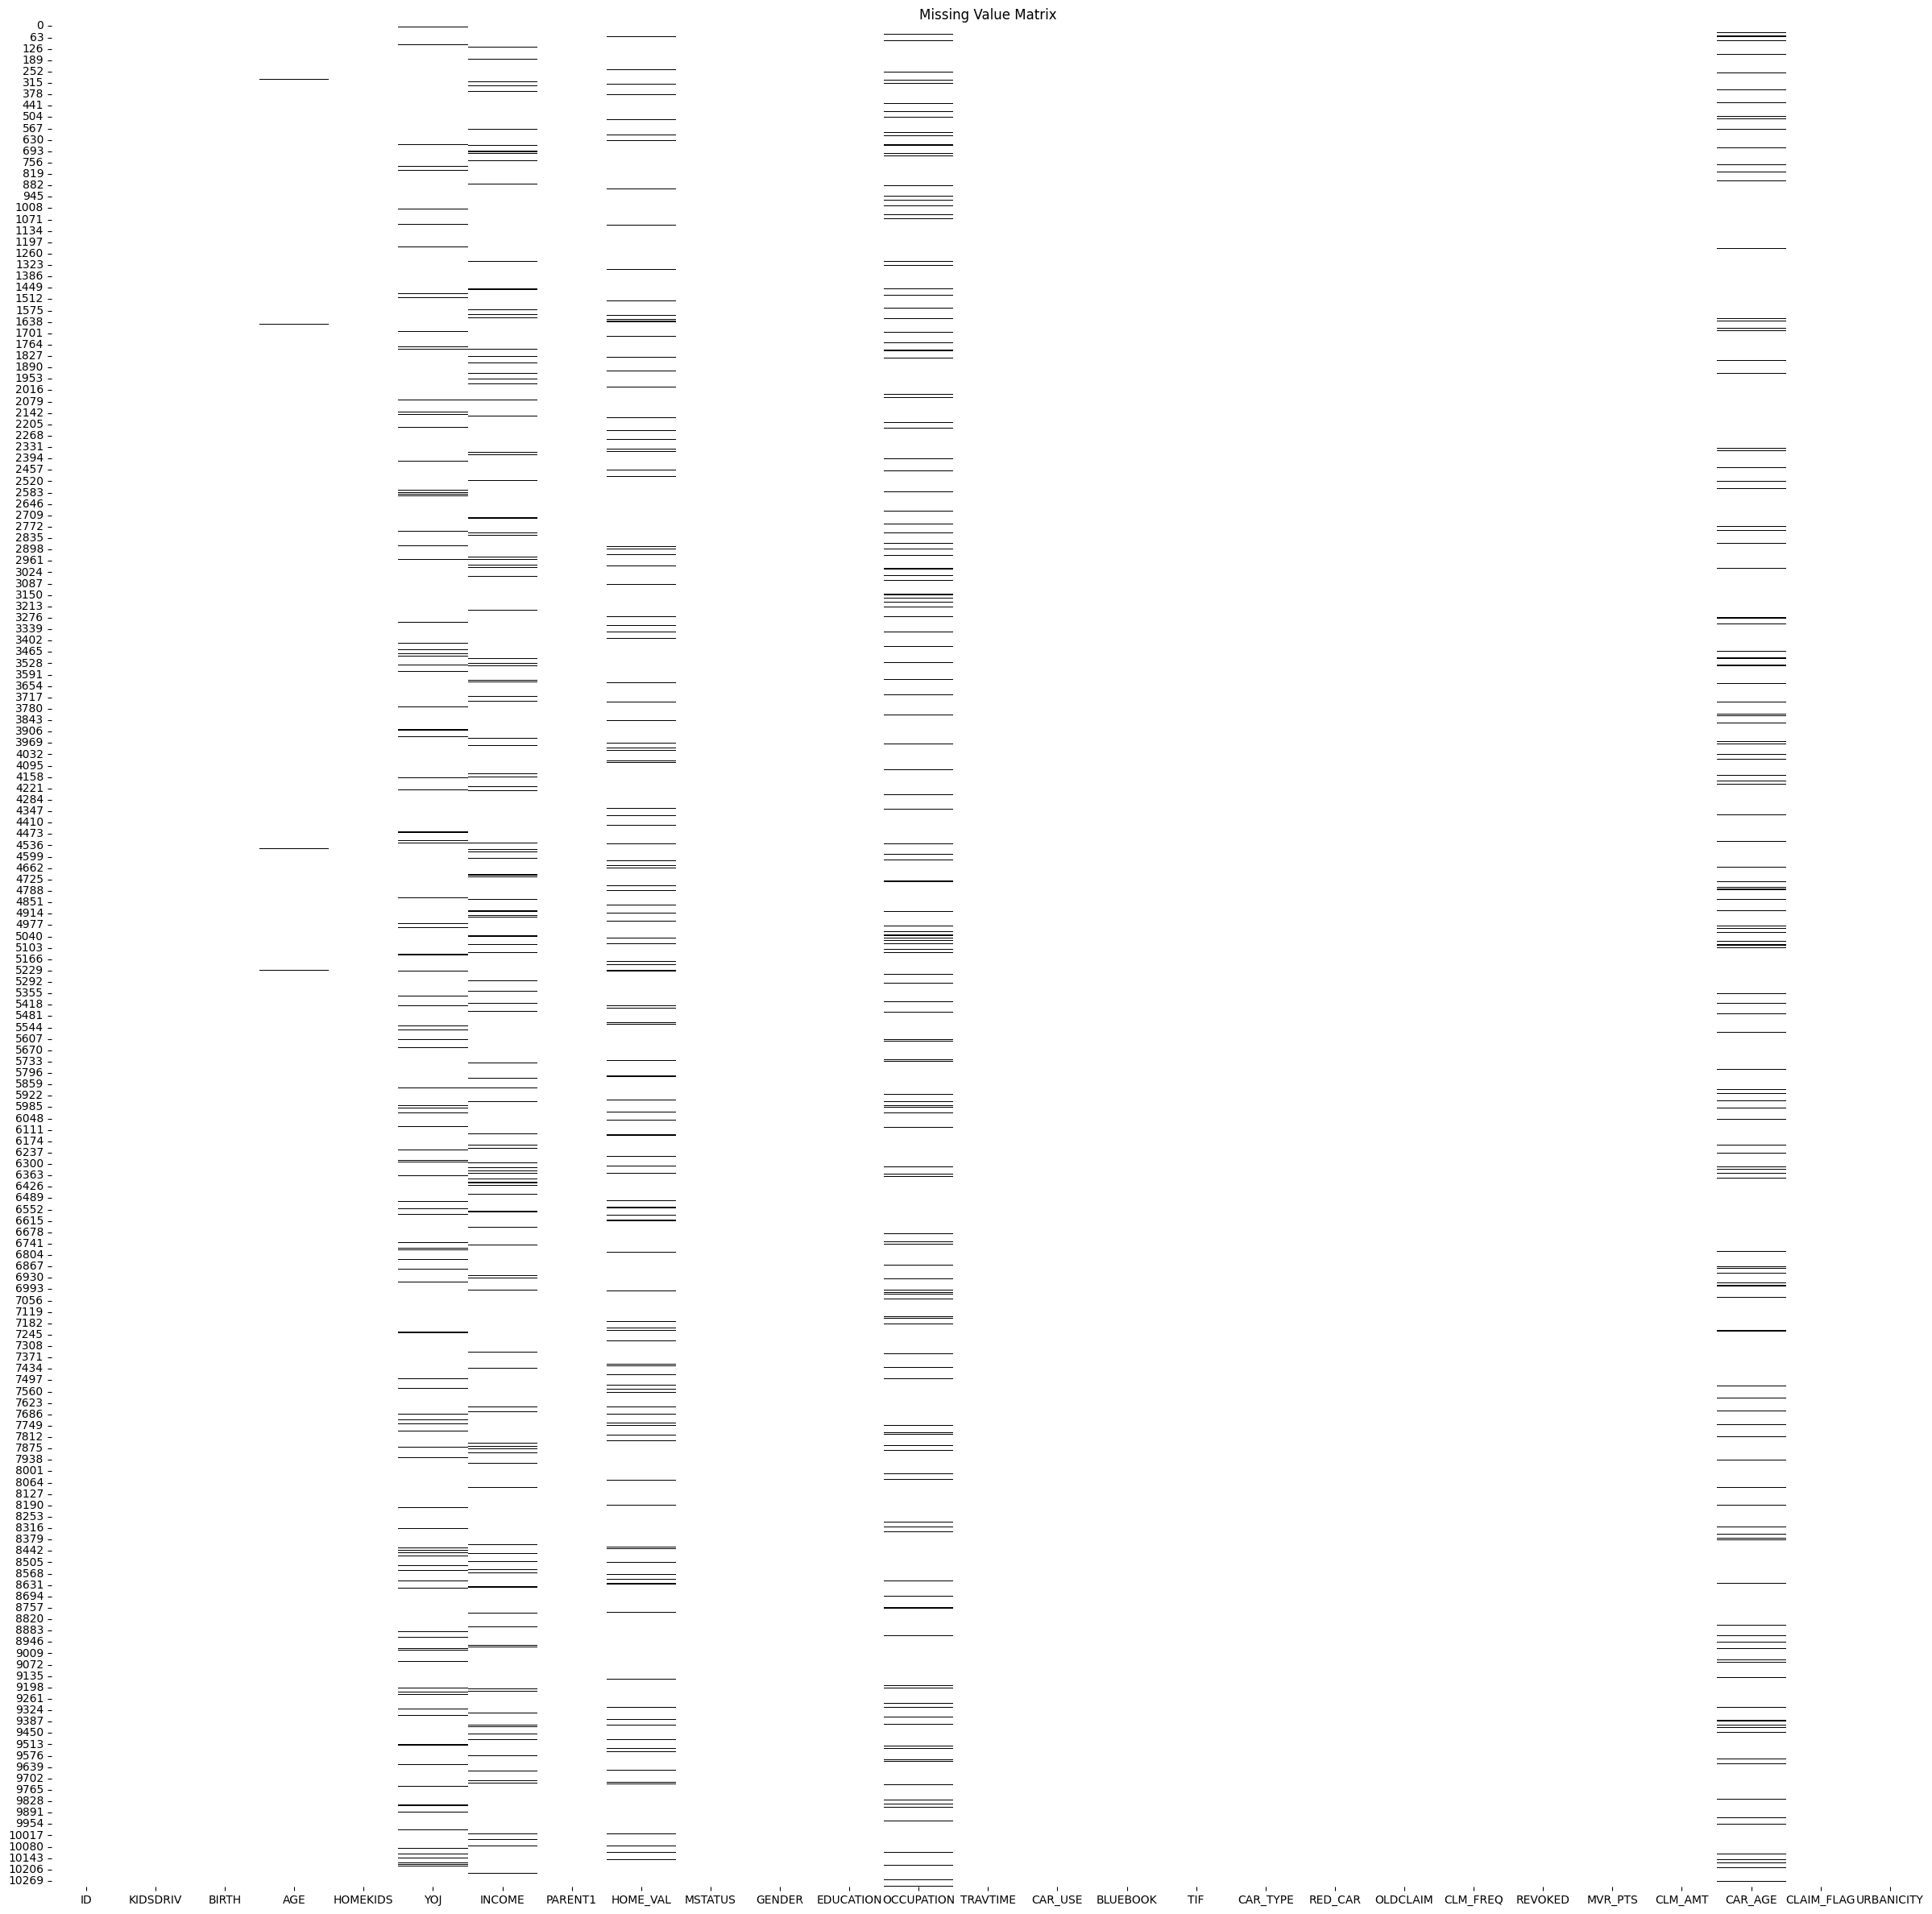

In [22]:
# Create the missing value matrix
missing_matrix = df.isnull()

# Plot the missing value matrix
plt.figure(figsize=(30, 30))
sns.heatmap(missing_matrix, cbar = False, cmap = 'binary')
plt.title('Missing Value Matrix')
plt.show()

A boolean matrix is depicted to check for the distribution of missing values across different columns. Using the command `sns.heatmap()`

After analyzing the missing value matrix, we determine whether there is a clear pattern within the missing values. In this case, we do not find a clear pattern. Therefore, we decide to proceed with the deletion of rows that contain missing values. Deleting rows with missing values is a common approach when the missing data does not follow a specific pattern and is relatively small in proportion to the overall dataset.

Please note that the decision to delete rows with missing values should be made carefully, as it may result in the loss of valuable information. Additionally, alternative methods such as imputation can be considered depending on the specific context and requirements of the project.

A `.copy()` version of the new dataset is saved to separate it from the original one.

In [23]:
df2 = df.dropna().copy()
df2

,ID,KIDSDRIV,BIRTH,AGE,HOMEKIDS,YOJ,INCOME,PARENT1,HOME_VAL,MSTATUS,GENDER,EDUCATION,OCCUPATION,TRAVTIME,CAR_USE,BLUEBOOK,TIF,CAR_TYPE,RED_CAR,OLDCLAIM,CLM_FREQ,REVOKED,MVR_PTS,CLM_AMT,CAR_AGE,CLAIM_FLAG,URBANICITY
0,63581743,0,16MAR39,60.0,0,11.0,"$67,349",No,$0,z_No,M,PhD,Professional,14,Private,"$14,230",11,Minivan,yes,"$4,461",2,No,3,$0,18.0,0,Highly Urban/ Urban
1,132761049,0,21JAN56,43.0,0,11.0,"$91,449",No,"$257,252",z_No,M,z_High School,z_Blue Collar,22,Commercial,"$14,940",1,Minivan,yes,$0,0,No,0,$0,1.0,0,Highly Urban/ Urban
2,921317019,0,18NOV51,48.0,0,11.0,"$52,881",No,$0,z_No,M,Bachelors,Manager,26,Private,"$21,970",1,Van,yes,$0,0,No,2,$0,10.0,0,Highly Urban/ Urban
3,727598473,0,05MAR64,35.0,1,10.0,"$16,039",No,"$124,191",Yes,z_F,z_High School,Clerical,5,Private,"$4,010",4,z_SUV,no,"$38,690",2,No,3,$0,10.0,0,Highly Urban/ Urban
6,871024631,0,05MAY65,34.0,1,12.0,"$125,301",Yes,$0,z_No,z_F,Bachelors,z_Blue Collar,46,Commercial,"$17,430",1,Sports Car,no,$0,0,No,0,"$2,946",7.0,1,Highly Urban/ Urban
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10296,121441578,0,01JUL64,35.0,0,11.0,"$43,112",No,$0,z_No,M,z_High School,z_Blue Collar,51,Commercial,"$27,330",10,Panel Truck,yes,$0,0,No,0,$0,8.0,0,z_Highly Rural/ Rural
10297,67790126,1,13AUG54,45.0,2,9.0,"$164,669",No,"$386,273",Yes,M,PhD,Manager,21,Private,"$13,270",15,Minivan,no,$0,0,No,2,$0,17.0,0,Highly Urban/ Urban
10299,849208064,0,18JUN51,48.0,0,15.0,"$39,837",No,"$170,611",Yes,z_F,<High School,z_Blue Collar,12,Private,"$13,820",7,z_SUV,no,$0,0,No,0,$0,1.0,0,Highly Urban/ Urban
10300,627828331,0,12DEC48,50.0,0,7.0,"$43,445",No,"$149,248",Yes,z_F,Bachelors,Home Maker,36,Private,"$22,550",6,Minivan,no,$0,0,No,0,$0,11.0,0,Highly Urban/ Urban


In [24]:
#Double-check for missing values
print("Columns with missing values:", missing_values)

for col in missing_values:
    nan_count = df2[col].isna().sum()
    nan_proportion = (nan_count / len(df2[col])) * 100
    print("Column:", col)
    print("Number of NaN values:", nan_count)
    print("Proportion of NaN values: {:.3f}%".format(nan_proportion))
    print() 

Columns with missing values: ['AGE', 'YOJ', 'INCOME', 'HOME_VAL', 'OCCUPATION', 'CAR_AGE']
Column: AGE
Number of NaN values: 0
Proportion of NaN values: 0.000%

Column: YOJ
Number of NaN values: 0
Proportion of NaN values: 0.000%

Column: INCOME
Number of NaN values: 0
Proportion of NaN values: 0.000%

Column: HOME_VAL
Number of NaN values: 0
Proportion of NaN values: 0.000%

Column: OCCUPATION
Number of NaN values: 0
Proportion of NaN values: 0.000%

Column: CAR_AGE
Number of NaN values: 0
Proportion of NaN values: 0.000%



### Variable Encoding

Since the dataset endow few columns indicating non-numerical variable, we need to transform the non-numerical variables into a suitable format. For columns whose variables share a hierarchical scale,, such as "Education" which assumes an intrinsic order within the different degrees, a different encoding approach is used. 

 - For variables without an inherent order, we apply a one-hot encoding approach, where new columns are created to represent the presence or absence of a particular characteristic. In this approach, if a characteristic is present, the corresponding column is assigned a value of 1; otherwise, it is assigned a value of 0.

 - For variables that do exhibit ordinality, each non-numeric variable is translated into a numeric scale ranging from 1 to 5. This allows us to capture the ordinal relationship between different categories while preserving the information in a numerical format.

In [25]:
# Define the columns for one-hot encoding and perform it
one_hot_cols = ['PARENT1', 
                'MSTATUS', 
                'GENDER', 
                'OCCUPATION', 
                'CAR_USE',
                'CAR_TYPE', 
                'RED_CAR', 
                'REVOKED', 
                'URBANICITY']

df_encoded = pd.get_dummies(df2, columns = one_hot_cols)

# Now OrdinalEncoding for "EDUCATION"
ordinal_encoder = OrdinalEncoder()
df_encoded['EDUCATION'] = ordinal_encoder.fit_transform(df2[['EDUCATION']].values.reshape(-1, 1))

# Drop useless column for the analysis
df_encoded.drop('BIRTH', axis=1, inplace=True)   
df_encoded.drop('ID',  axis=1, inplace=True)  

df_encoded

,KIDSDRIV,AGE,HOMEKIDS,YOJ,INCOME,HOME_VAL,EDUCATION,TRAVTIME,BLUEBOOK,TIF,OLDCLAIM,CLM_FREQ,MVR_PTS,CLM_AMT,CAR_AGE,CLAIM_FLAG,PARENT1_No,PARENT1_Yes,MSTATUS_Yes,MSTATUS_z_No,GENDER_M,GENDER_z_F,OCCUPATION_Clerical,OCCUPATION_Doctor,OCCUPATION_Home Maker,OCCUPATION_Lawyer,OCCUPATION_Manager,OCCUPATION_Professional,OCCUPATION_Student,OCCUPATION_z_Blue Collar,CAR_USE_Commercial,CAR_USE_Private,CAR_TYPE_Minivan,CAR_TYPE_Panel Truck,CAR_TYPE_Pickup,CAR_TYPE_Sports Car,CAR_TYPE_Van,CAR_TYPE_z_SUV,RED_CAR_no,RED_CAR_yes,REVOKED_No,REVOKED_Yes,URBANICITY_Highly Urban/ Urban,URBANICITY_z_Highly Rural/ Rural
0,0,60.0,0,11.0,"$67,349",$0,3.0,14,"$14,230",11,"$4,461",2,3,$0,18.0,0,1,0,0,1,1,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,1,1,0,1,0
1,0,43.0,0,11.0,"$91,449","$257,252",4.0,22,"$14,940",1,$0,0,0,$0,1.0,0,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,1,0,0,0,0,0,0,1,1,0,1,0
2,0,48.0,0,11.0,"$52,881",$0,1.0,26,"$21,970",1,$0,0,2,$0,10.0,0,1,0,0,1,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,1,0,1,0
3,0,35.0,1,10.0,"$16,039","$124,191",4.0,5,"$4,010",4,"$38,690",2,3,$0,10.0,0,1,0,1,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,1,0,1,0
6,0,34.0,1,12.0,"$125,301",$0,1.0,46,"$17,430",1,$0,0,0,"$2,946",7.0,1,0,1,0,1,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,1,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10296,0,35.0,0,11.0,"$43,112",$0,4.0,51,"$27,330",10,$0,0,0,$0,8.0,0,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0,0,1,1,0,0,1
10297,1,45.0,2,9.0,"$164,669","$386,273",3.0,21,"$13,270",15,$0,0,2,$0,17.0,0,1,0,1,0,1,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,1,0,1,0,1,0
10299,0,48.0,0,15.0,"$39,837","$170,611",0.0,12,"$13,820",7,$0,0,0,$0,1.0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,1,0,1,0,1,0
10300,0,50.0,0,7.0,"$43,445","$149,248",1.0,36,"$22,550",6,$0,0,0,$0,11.0,0,1,0,1,0,0,1,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,1,0,1,0,1,0


There are few numerical data with the canonical dollar form such as $164,669. A cleanage of such data is required to fit them into the Logistic model. The command `.str.replace()` eplace specific patterns in the strings. More specifically, we are substituting characters that are not digits `/d` or periods `.`. The expression `[^\d.]` matches any character that is not a digit or a period. By replacing those characters with an a resulting floating point-numbers string. Now the values in the column are intended to be numeric.

In [26]:
columns_to_clean = ['OLDCLAIM', 'BLUEBOOK', 'INCOME', 'HOME_VAL', 'CLM_AMT']
for column in columns_to_clean:
    df_encoded[column] = df_encoded[column].str.replace('[^\d.]', '', regex=True).astype(float)

Lastly, trying to give an efficiency boost to the model, we rescale all the numerical variables using the `MinMaxScaler()` function.

In [27]:
variables_to_rescale = ['OLDCLAIM', 'BLUEBOOK', 'INCOME', 'HOME_VAL', 'CLM_AMT', 'YOJ', 'TRAVTIME', 'TIF', 'CAR_AGE']

scaler = MinMaxScaler()

df_encoded[variables_to_rescale] = scaler.fit_transform(df_encoded[variables_to_rescale])

In [28]:
df_encoded

,KIDSDRIV,AGE,HOMEKIDS,YOJ,INCOME,HOME_VAL,EDUCATION,TRAVTIME,BLUEBOOK,TIF,OLDCLAIM,CLM_FREQ,MVR_PTS,CLM_AMT,CAR_AGE,CLAIM_FLAG,PARENT1_No,PARENT1_Yes,MSTATUS_Yes,MSTATUS_z_No,GENDER_M,GENDER_z_F,OCCUPATION_Clerical,OCCUPATION_Doctor,OCCUPATION_Home Maker,OCCUPATION_Lawyer,OCCUPATION_Manager,OCCUPATION_Professional,OCCUPATION_Student,OCCUPATION_z_Blue Collar,CAR_USE_Commercial,CAR_USE_Private,CAR_TYPE_Minivan,CAR_TYPE_Panel Truck,CAR_TYPE_Pickup,CAR_TYPE_Sports Car,CAR_TYPE_Van,CAR_TYPE_z_SUV,RED_CAR_no,RED_CAR_yes,REVOKED_No,REVOKED_Yes,URBANICITY_Highly Urban/ Urban,URBANICITY_z_Highly Rural/ Rural
0,0,60.0,0,0.478261,0.183497,0.000000,3.0,0.065693,0.197456,0.416667,0.078212,2,3,0.000000,0.677419,0,1,0,0,1,1,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,1,1,0,1,0
1,0,43.0,0,0.478261,0.249159,0.290588,4.0,0.124088,0.208469,0.000000,0.000000,0,0,0.000000,0.129032,0,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,1,0,0,0,0,0,0,1,1,0,1,0
2,0,48.0,0,0.478261,0.144078,0.000000,1.0,0.153285,0.317512,0.000000,0.000000,0,2,0.000000,0.419355,0,1,0,0,1,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,1,0,1,0
3,0,35.0,1,0.434783,0.043699,0.140284,4.0,0.000000,0.038933,0.125000,0.678332,2,3,0.000000,0.419355,0,1,0,1,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,1,0,1,0
6,0,34.0,1,0.521739,0.341392,0.000000,1.0,0.299270,0.247092,0.000000,0.000000,0,0,0.034446,0.322581,1,0,1,0,1,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,1,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10296,0,35.0,0,0.478261,0.117462,0.000000,4.0,0.335766,0.400651,0.375000,0.000000,0,0,0.000000,0.354839,0,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0,0,1,1,0,0,1
10297,1,45.0,2,0.391304,0.448653,0.436328,3.0,0.116788,0.182566,0.583333,0.000000,0,2,0.000000,0.645161,0,1,0,1,0,1,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,1,0,1,0,1,0
10299,0,48.0,0,0.652174,0.108539,0.192719,0.0,0.051095,0.191097,0.250000,0.000000,0,0,0.000000,0.129032,0,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,1,0,1,0,1,0
10300,0,50.0,0,0.304348,0.118369,0.168588,1.0,0.226277,0.326508,0.208333,0.000000,0,0,0.000000,0.451613,0,1,0,1,0,0,1,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,1,0,1,0,1,0


Now we set the model defining the target variable and generating the `X_train`, `X_test`, `y_train` and `y_test`. 
The model is a Logistic Regression with a maximum of 1.500 iterations. Various performance indicators are used to show accountability of the model. 

In [29]:
X = df_encoded.drop(['CLAIM_FLAG'], axis = 1)
y = df_encoded['CLAIM_FLAG']

In [30]:
(X_train, X_test, y_train, y_test) = train_test_split(X, y, test_size = 0.1, random_state = 42)

In [31]:
logreg_model = LogisticRegression(max_iter = 1500)
logreg_model.fit(X_train, y_train)
y_pred = logreg_model.predict(X_test)

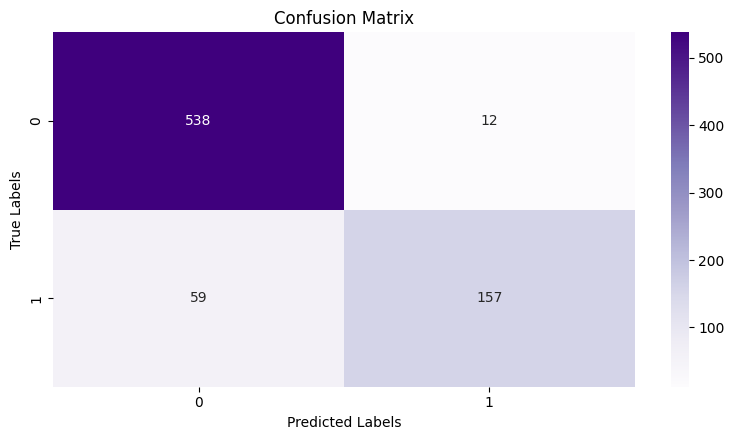

Accuracy: 0.907
Precision: 0.929
Recall: 0.727
F1-score: 0.816


In [41]:
accuracy = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

plt.figure(figsize=(8, 4.5))
sns.heatmap(cm, annot=True, cmap="Purples", fmt="d")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.tight_layout()
plt.show()

print("Accuracy: {:.3f}".format(accuracy))
print("Precision: {:.3f}".format(precision))
print("Recall: {:.3f}".format(recall))
print("F1-score: {:.3f}".format(f1))

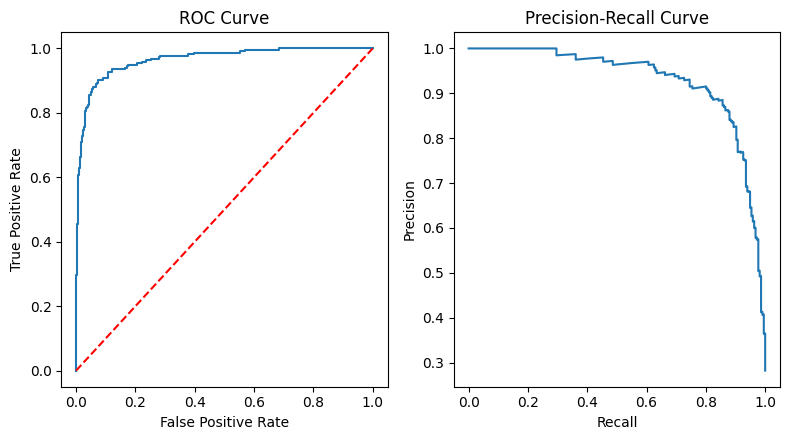

AUC: 0.965


In [33]:
y_pred_proba = logreg_model.predict_proba(X_test)[:, 1]
auc = roc_auc_score(y_test, y_pred_proba)
fpr, tpr, thresholds_roc = roc_curve(y_test, y_pred_proba)
precision, recall, thresholds_pr = precision_recall_curve(y_test, y_pred_proba)

# Plot ROC curve
plt.figure(figsize=(8, 4.5))
plt.subplot(1, 2, 1)
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], linestyle='--', color='r')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")

plt.subplot(1, 2, 2)
plt.plot(recall, precision)
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve")

plt.tight_layout()
plt.show()

print("AUC: {:.3f}".format(auc))

### Comments

The implemented logistic regression model shows promise with an accuracy score of 90.73%, indicating accurate predictions for a significant portion of test instances. The precision score of 92.9% suggests reliable positive outcome predictions. Although the recall score is 72.7%, indicating some missed positive instances, the F1-score of 0.816 balances precision and recall well. The confusion matrix shows a good balance between true negatives, true positives, false positives, and false negatives. The high AUC score of 0.965 indicates a strong ability to differentiate between classes. Overall, the model provides valuable insights for further analysis.